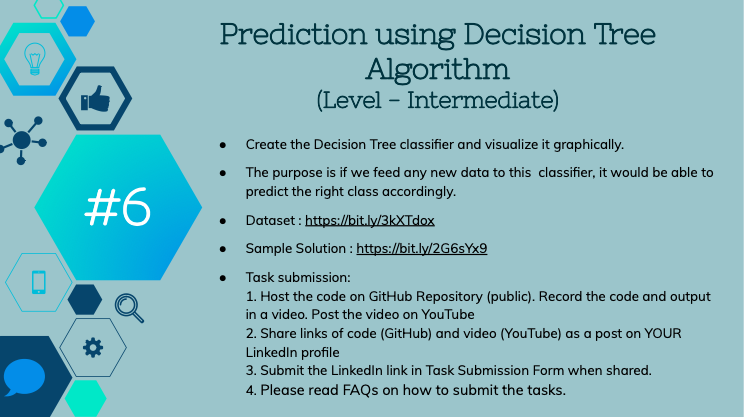

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from graphviz import Source
from IPython.display import Image
from IPython.display import display

/Users/kshitiz/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [7]:
iris=datasets.load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
fl_class=iris.target
print(fl_class)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
klassifir = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=0)
klassifir.fit(x_train,y_train)

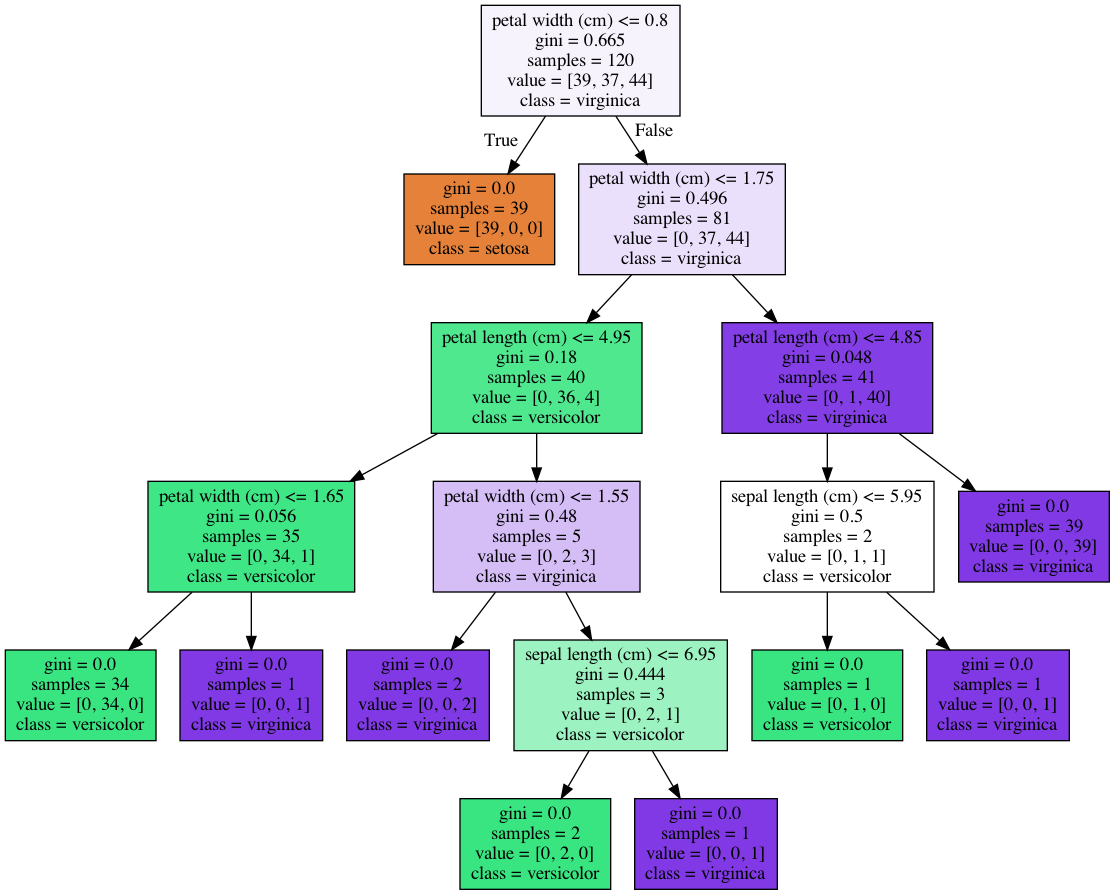

In [33]:
#Visualizing the decision tree
graph = Source(export_graphviz(klassifir, out_file=None,feature_names=data.columns,
                               class_names=iris.target_names,filled = True))
display(Image(graph.pipe(format='png')))

In [34]:
y_pred = klassifir.predict(x_test)

In [35]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [36]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [37]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Macro F1 score: ", f1_score(y_test,y_pred,average='macro'))

Accuracy:  1.0
Macro F1 score:  1.0


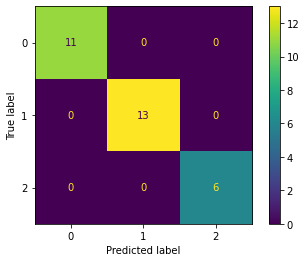

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# As we can see due to the data being extremely simplistic the test data was predicted with 100% accuracy